In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan
import seaborn as sns
import networkx

from sklearn.metrics.pairwise import pairwise_distances


In [2]:
path1 = 'https://raw.githubusercontent.com/acigna/corona_personal_walk_tracking/master/personal_walk.csv'
path2 = 'https://raw.githubusercontent.com/acigna/corona_personal_walk_tracking/master/personal_walk2.csv'

positions = pd.read_csv(path1)
positions1 = pd.read_csv(path2)
positions = positions.append(positions1)
mat=pd.DataFrame(columns=['lat','lon'])
mat['lat']= positions.lat.values
mat['lon']= positions.lon.values
#print(mat)
#plt.plot(mat['lon'], mat['lat'], c = 'red')
#plt.show

In [3]:
# input of HDBSCAN (positions)
X = np.array([mat.lat,mat.lon])
X=X.T
print(X)
#plt.scatter(*X.T, s=50, linewidth=0, c='b', alpha=0.25)



[[36.7712434  3.3001456]
 [36.7712581  3.30014  ]
 [36.7712635  3.3001314]
 ...
 [36.7726814  3.3004567]
 [36.7726736  3.3004513]
 [36.7726662  3.300447 ]]


In [4]:
#HDBSCAN using Data

#cluster = hdbscan.HDBSCAN(min_cluster_size=50).fit(np.radians(X))  #np.radians(X)
cluster = hdbscan.HDBSCAN(min_cluster_size=25, metric='haversine').fit(np.radians(X))
labels = cluster.labels_
#print(labels)
print(len(np.unique(labels)))
#print(cluster.probabilities_)
core_sample_indices_ = np.array([range(1,2375)])
print(core_sample_indices_)
core_samples_mask = np.zeros_like(cluster.labels_, dtype=bool)
core_samples_mask[core_sample_indices_] = True



# mixe HDBSCAN with DBSCAN 

#X = np.radians(X)
#earth_radius_km = 6371
#epsilon = 0.0000005/ earth_radius_km #calculate 5 meter epsilon threshold

#cluster = hdbscan.HDBSCAN(min_cluster_size=6, metric='haversine', cluster_selection_epsilon=epsilon, cluster_selection_method = 'eom')
#cluster.fit(X)

14
[[   1    2    3 ... 2372 2373 2374]]


In [320]:
import time
plot_kwds = {'alpha' : 0.5, 's' : 2, 'linewidths':2}
def plot_clusters(data, labels):
    #start_time = time.time()
    #labels = hdbscan(*30, **kwds).fit_predict(data)
    #end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(data.T[1], data.T[0], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.set_xlim((data.T[1]).min(), (data.T[1]).max())
    frame.set_ylim((data.T[0]).min(), (data.T[0]).max())
    frame.axes.get_xaxis().set_visible(True)
    frame.axes.get_yaxis().set_visible(True)
    plt.title('Clusters found by {}'.format(str('HDBSCAN')), fontsize=11)
    #plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)
    

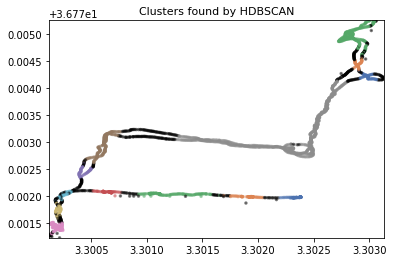

In [321]:
plot_clusters(X,labels)

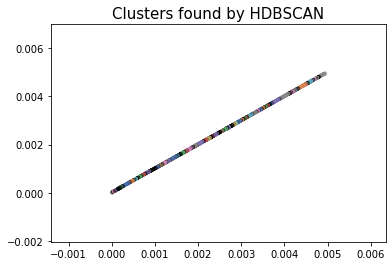

In [241]:
# HDBSCAN using distance
distance_matrix = pairwise_distances(X)
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
clusterer.labels_
plot_clusters(distance_matrix,clusterer.labels_)